<a href="https://colab.research.google.com/github/sharonma1218/mugss-datathon/blob/main/Sharon%20Ma_MUgSS%20Datathon_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 9 - MUgSS Datathon - Code By Sharon Ma

In [ ]:
install.packages("stargazer")

In [ ]:
library(tidyverse)
library(ggplot2)
library(stargazer)
options(repr.plot.width = 5, repr.plot.height = 4)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
df<-read.csv("/content/mxmh_survey_results.csv")

### Age: Mean/Median, Distribution, & Correlation

[1] 25.2068

[1] 21

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


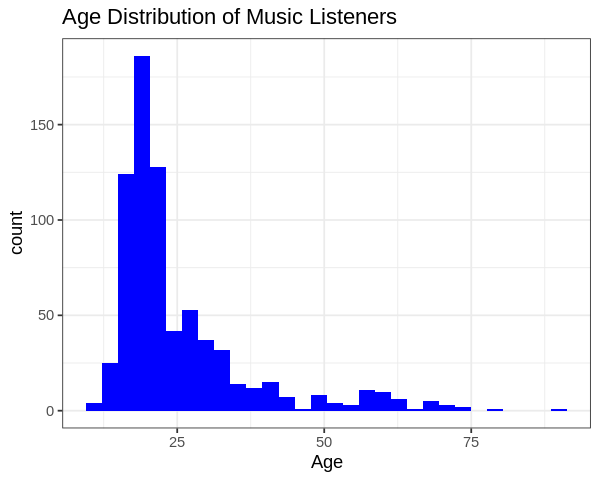

In [ ]:
# The mean age is 25.207. 
# The median age is 21.
# B/c the mean age != the median age, we can anticipate that the distribution is right skewed (leaning towards the younger side),
# and we can see that from the following histogram: 

mean(df$Age,na.rm=TRUE)

median(df$Age,na.rm=TRUE)

df%>%
  ggplot(aes(x=Age))+
  geom_histogram(fill="blue")+
  theme_bw()+
  labs(title="Age Distribution of Music Listeners")

### Hours Listened: Mean/Median, Distribution, & Correlation

[1] 3.572758

[1] 3

ERROR: ignored

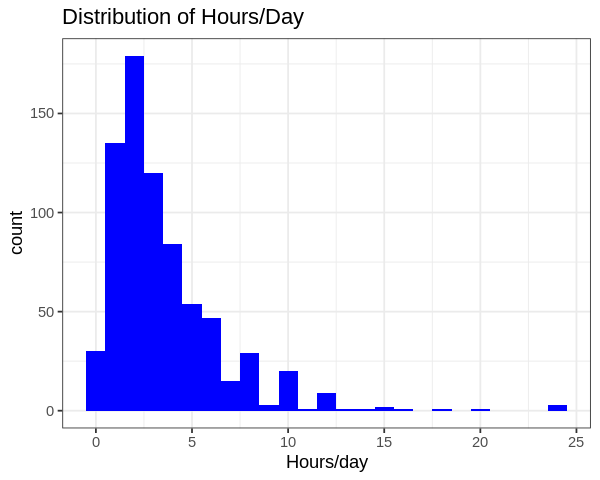

In [ ]:
# This distribution is also slightly right skewed, w/ the median & mean hours listened b/w 3 and 3.6

mean(df$Hours.per.day)

median(df$Hours.per.day)

df%>%
  ggplot(aes(x=Hours.per.day))+
  geom_histogram(binwidth=1,fill="blue")+
  labs(title="Distribution of Hours/Day",
        x="Hours/day")+
          theme_bw()

In [ ]:
# If we regress hours/day on anxiety, depression, insomnia, and OCD; 
reg01<-lm(Anxiety~Hours.per.day+Age,data=df)
reg02<-lm(Depression~Hours.per.day+Age,data=df)
reg03<-lm(Insomnia~Hours.per.day+Age,data=df)
reg04<-lm(OCD~Hours.per.day+Age,data=df)

In [ ]:
stargazer(reg01,reg02,reg03,reg04)

### Listening to Music While Working: Mean/Median, Distribution, & Correlation


     No Yes 
  3 154 579 

[1] 0.7899045

[1] 0.2100955

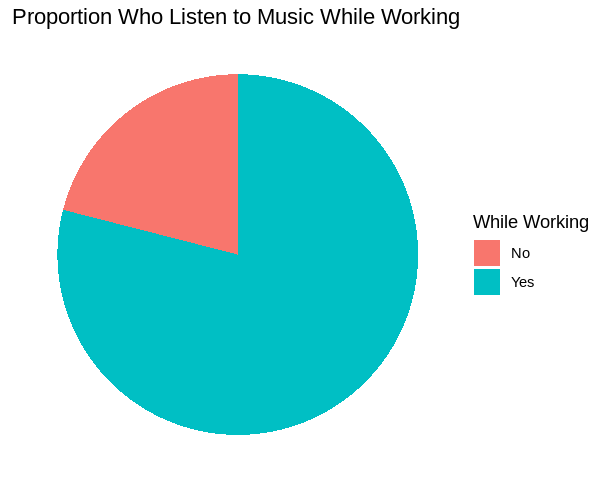

In [ ]:
# Approx 79% of the sample listen to music while working while 21% do not.

table(df$While.working)

579/(154+579)

154/(154+579)

df%>%
  filter(While.working=="No" | While.working=="Yes")%>%
  mutate(n=n())%>%
  ggplot(aes(x="",y=n,fill=While.working))+
  geom_bar(stat="identity",width=1)+
  coord_polar("y",start=0)+
  theme_void()+
  labs(title="Proportion Who Listen to Music While Working",
        fill="While Working")

# If we regress listening to music while working on anxiety, depression, insomnia, and OCD,
# (Luka has the code for this.)

### Playing an Instrument: Mean/Median, Distribution, & Correlation


     No Yes 
  4 497 235 

[1] 0.6789617

[1] 0.3210383

[1] 732

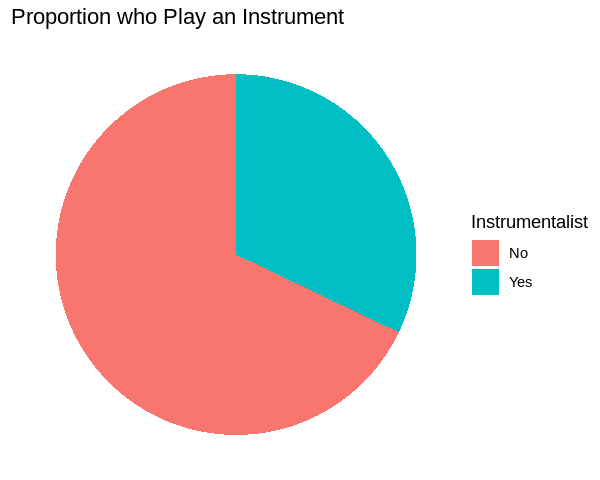

In [ ]:
# Approx 32% of the sample are instrumentalists while 68% are not.

table(df$Instrumentalist)
497/(497+235)
235/(497+235)
497+235

df%>%
  filter(Instrumentalist=="No" | Instrumentalist=="Yes")%>%
  mutate(n=n())%>%
  ggplot(aes(x="",y=n,fill=Instrumentalist))+
  geom_bar(stat="identity",width=1)+
  coord_polar("y",start=0)+
  theme_void()+
  labs(title="Proportion who Play an Instrument",
        fill="Instrumentalist")

In [ ]:
# If we regress instrumentalist on Anxiety, Depression, Insomnia, and OCD; 
reg05<-lm(Anxiety~Instrumentalist+Age,data=df)
reg06<-lm(Depression~Instrumentalist+Age,data=df)
reg07<-lm(Insomnia~Instrumentalist+Age,data=df)
reg08<-lm(OCD~Instrumentalist+Age,data=df)
# There is no statisitcally significant correlation b/w composing music & Anxiety, Depression, Insomnia, & OCD. 

In [ ]:
stargazer(reg05,reg06,reg07,reg08)


% Table created by stargazer v.5.2.3 by Marek Hlavac, Social Policy Institute. E-mail: marek.hlavac at gmail.com
% Date and time: Sat, Mar 11, 2023 - 07:24:26 PM
\begin{table}[!htbp] \centering 
  \caption{} 
  \label{} 
\begin{tabular}{@{\extracolsep{5pt}}lcccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{4}{c}{\textit{Dependent variable:}} \\ 
\cline{2-5} 
\\[-1.8ex] & Anxiety & Depression & Insomnia & OCD \\ 
\\[-1.8ex] & (1) & (2) & (3) & (4)\\ 
\hline \\[-1.8ex] 
 InstrumentalistNo & 0.643 & 0.311 & $-$1.097 & 0.374 \\ 
  & (1.384) & (1.515) & (1.556) & (1.418) \\ 
  & & & & \\ 
 InstrumentalistYes & 0.673 & 0.243 & $-$0.913 & 0.364 \\ 
  & (1.389) & (1.520) & (1.561) & (1.423) \\ 
  & & & & \\ 
 Age & $-$0.041$^{***}$ & $-$0.031$^{***}$ & 0.003 & $-$0.031$^{***}$ \\ 
  & (0.009) & (0.009) & (0.010) & (0.009) \\ 
  & & & & \\ 
 Constant & 6.217$^{***}$ & 5.292$^{***}$ & 4.698$^{***}$ & 3.039$^{**}$ \\ 
  & (1.385) & (1.516) & (1.556) & (1.419) \\ 
  & & & & \\ 
\hline \

### Composing Music: Mean/Median, Distribution, & Correlation


     No Yes 
  1 609 126 

[1] 0.8285714

[1] 0.1714286

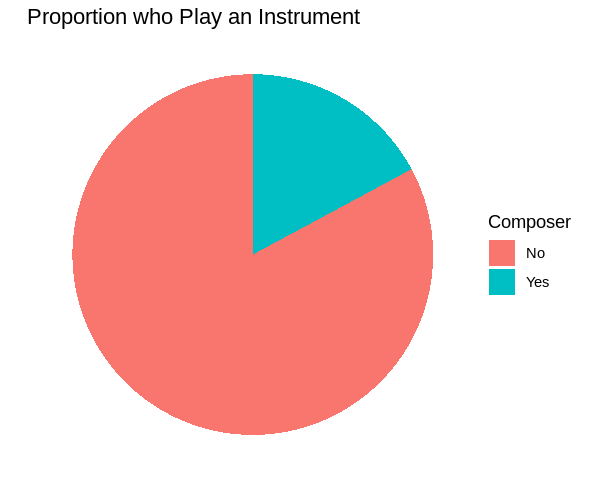

In [ ]:
# Approx 17% of the sample are composers while 83% are not. 

table(df$Composer)
609/(609+126)
126/(609+126)

df%>%
  filter(Composer=="No" | Composer=="Yes")%>%
  mutate(n=n())%>%
  ggplot(aes(x="",y=n,fill=Composer))+
  geom_bar(stat="identity",width=1)+
  coord_polar("y",start=0)+
  theme_void()+
  labs(title="Proportion who Play an Instrument",
        fill="Composer")

In [ ]:
# If we regress composer on Anxiety, Depression, Insomnia, and OCD; 
reg09<-lm(Anxiety~Composer+Age,data=df)
reg10<-lm(Depression~Composer+Age,data=df)
reg11<-lm(Insomnia~Composer+Age,data=df)
reg12<-lm(OCD~Composer+Age,data=df)
# There is no statisitcally significant correlation b/w composing music & Anxiety, Depression, Insomnia, & OCD. 

In [ ]:
stargazer(reg09)

In [ ]:
stargazer(reg10)

In [ ]:
stargazer(reg11)

In [ ]:
stargazer(reg12)

### Fave Genre 

In [ ]:
df%>%colnames

[1] "Timestamp"                    "Age"                         
 [3] "Primary.streaming.service"    "Hours.per.day"               
 [5] "While.working"                "Instrumentalist"             
 [7] "Composer"                     "Fav.genre"                   
 [9] "Exploratory"                  "Foreign.languages"           
[11] "BPM"                          "Frequency..Classical."       
[13] "Frequency..Country."          "Frequency..EDM."             
[15] "Frequency..Folk."             "Frequency..Gospel."          
[17] "Frequency..Hip.hop."          "Frequency..Jazz."            
[19] "Frequency..K.pop."            "Frequency..Latin."           
[21] "Frequency..Lofi."             "Frequency..Metal."           
[23] "Frequency..Pop."              "Frequency..R.B."             
[25] "Frequency..Rap."              "Frequency..Rock."            
[27] "Frequency..Video.game.music." "Anxiety"                     
[29] "Depression"                   "Insomnia"                    
[31] "OCD"                          "Music.effects"               
[33] "Permissions"

In [ ]:
df1<-df%>%
  rename(freq_classic="Frequency..Classical.",
          freq_country="Frequency..Country.",
          freq_edm="Frequency..EDM.",
          freq_folk="Frequency..Folk.",
          freq_gospel="Frequency..Gospel.",
          freq_hiphop="Frequency..Hip.hop.",
          freq_jazz="Frequency..Jazz.",
          freq_kpop="Frequency..K.pop.",
          freq_latin="Frequency..Latin.",
          freq_lofi="Frequency..Lofi.",
          freq_metal="Frequency..Metal.",
          freq_pop="Frequency..Pop.",
          freq_rnb="Frequency..R.B.",
          freq_rap="Frequency..Rap.",
          freq_rock="Frequency..Rock.",
          freq_vidgame="Frequency..Video.game.music.")

In [ ]:
# Regression genre frequencies on anxiety:
reg13<-lm(Anxiety~freq_classic+Age,data=df1)
reg14<-lm(Anxiety~freq_country+Age,data=df1)
reg15<-lm(Anxiety~freq_edm+Age,data=df1)
reg16<-lm(Anxiety~freq_folk+Age,data=df1)
reg17<-lm(Anxiety~freq_gospel+Age,data=df1)
reg18<-lm(Anxiety~freq_hiphop+Age,data=df1)
reg19<-lm(Anxiety~freq_jazz+Age,data=df1)
reg20<-lm(Anxiety~freq_kpop+Age,data=df1)
reg21<-lm(Anxiety~freq_latin+Age,data=df1)
reg22<-lm(Anxiety~freq_lofi+Age,data=df1)
reg23<-lm(Anxiety~freq_metal+Age,data=df1)
reg24<-lm(Anxiety~freq_pop+Age,data=df1)
reg25<-lm(Anxiety~freq_rnb+Age,data=df1)
reg26<-lm(Anxiety~freq_rap+Age,data=df1)
reg27<-lm(Anxiety~freq_rock+Age,data=df1)
reg28<-lm(Anxiety~freq_vidgame+Age,data=df1)

In [ ]:
stargazer(reg16)

In [ ]:
stargazer(reg23)

In [ ]:
stargazer(reg24)

In [ ]:
stargazer(reg25)

In [ ]:
stargazer(reg26)

In [ ]:
# Regression genre frequencies on depression:
reg29<-lm(Depression~freq_classic+Age,data=df1)
reg30<-lm(Depression~freq_country+Age,data=df1)
reg31<-lm(Depression~freq_edm+Age,data=df1)
reg32<-lm(Depression~freq_folk+Age,data=df1)
reg33<-lm(Depression~freq_gospel+Age,data=df1)
reg34<-lm(Depression~freq_hiphop+Age,data=df1)
reg35<-lm(Depression~freq_jazz+Age,data=df1)
reg36<-lm(Depression~freq_kpop+Age,data=df1)
reg37<-lm(Depression~freq_latin+Age,data=df1)
reg38<-lm(Depression~freq_lofi+Age,data=df1)
reg39<-lm(Depression~freq_metal+Age,data=df1)
reg40<-lm(Depression~freq_pop+Age,data=df1)
reg41<-lm(Depression~freq_rnb+Age,data=df1)
reg42<-lm(Depression~freq_rap+Age,data=df1)
reg43<-lm(Depression~freq_rock+Age,data=df1)
reg44<-lm(Depression~freq_vidgame+Age,data=df1)

In [ ]:
stargazer(reg31)

In [ ]:
stargazer(reg32)

In [ ]:
stargazer(reg34)

In [ ]:
stargazer(reg39)

In [ ]:
stargazer(reg42)

In [ ]:
stargazer(reg43)

In [ ]:
# Regression genre frequencies on insomnia:
reg45<-lm(Insomnia~freq_classic+Age,data=df1)
reg46<-lm(Insomnia~freq_country+Age,data=df1)
reg47<-lm(Insomnia~freq_edm+Age,data=df1)
reg48<-lm(Insomnia~freq_folk+Age,data=df1)
reg49<-lm(Insomnia~freq_gospel+Age,data=df1)
reg50<-lm(Insomnia~freq_hiphop+Age,data=df1)
reg51<-lm(Insomnia~freq_jazz+Age,data=df1)
reg52<-lm(Insomnia~freq_kpop+Age,data=df1)
reg53<-lm(Insomnia~freq_latin+Age,data=df1)
reg54<-lm(Insomnia~freq_lofi+Age,data=df1)
reg55<-lm(Insomnia~freq_metal+Age,data=df1)
reg56<-lm(Insomnia~freq_pop+Age,data=df1)
reg57<-lm(Insomnia~freq_rnb+Age,data=df1)
reg58<-lm(Insomnia~freq_rap+Age,data=df1)
reg59<-lm(Insomnia~freq_rock+Age,data=df1)
reg60<-lm(Insomnia~freq_vidgame+Age,data=df1)

In [ ]:
summary(reg47)


Call:
lm(formula = Insomnia ~ freq_edm + Age, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3514 -2.8698 -0.4149  2.5591  6.6024 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.328241   0.310424  10.722   <2e-16 ***
freq_edmRarely          0.463559   0.284675   1.628   0.1039    
freq_edmSometimes       0.430746   0.311431   1.383   0.1671    
freq_edmVery frequently 0.793582   0.372702   2.129   0.0336 *  
Age                     0.004332   0.009514   0.455   0.6490    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.086 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.008075,	Adjusted R-squared:  0.00264 
F-statistic: 1.486 on 4 and 730 DF,  p-value: 0.2047


In [ ]:
summary(reg50)


Call:
lm(formula = Insomnia ~ freq_hiphop + Age, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2471 -2.5350 -0.5001  2.5055  6.5873 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                3.364074   0.353906   9.506   <2e-16 ***
freq_hiphopRarely          0.632228   0.313445   2.017   0.0441 *  
freq_hiphopSometimes       0.064872   0.312360   0.208   0.8355    
freq_hiphopVery frequently 0.476333   0.365015   1.305   0.1923    
Age                        0.003743   0.009559   0.392   0.6954    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.086 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.007911,	Adjusted R-squared:  0.002475 
F-statistic: 1.455 on 4 and 730 DF,  p-value: 0.2141


In [ ]:
summary(reg54)


Call:
lm(formula = Insomnia ~ freq_lofi + Age, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3667 -2.7166 -0.5741  2.3868  6.5250 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              3.407240   0.331795  10.269   <2e-16 ***
freq_lofiRarely          0.203870   0.284031   0.718   0.4731    
freq_lofiSometimes       0.227203   0.312075   0.728   0.4668    
freq_lofiVery frequently 0.823909   0.389472   2.115   0.0347 *  
Age                      0.005214   0.009705   0.537   0.5913    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.089 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.006147,	Adjusted R-squared:  0.0007016 
F-statistic: 1.129 on 4 and 730 DF,  p-value: 0.3416


In [ ]:
summary(reg55)


Call:
lm(formula = Insomnia ~ freq_metal + Age, data = df1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.470 -2.603 -0.414  2.404  6.847 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.132179   0.300716  10.416  < 2e-16 ***
freq_metalRarely          0.439406   0.289943   1.515 0.130082    
freq_metalSometimes       1.238904   0.324485   3.818 0.000146 ***
freq_metalVery frequently 1.161240   0.315375   3.682 0.000248 ***
Age                       0.001480   0.009375   0.158 0.874569    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.054 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.02854,	Adjusted R-squared:  0.02322 
F-statistic: 5.362 on 4 and 730 DF,  p-value: 0.0002934


In [ ]:
summary(reg58)


Call:
lm(formula = Insomnia ~ freq_rap + Age, data = df1)

Residuals:
   Min     1Q Median     3Q    Max 
-4.264 -2.828 -0.627  2.378  6.740 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             3.194127   0.351982   9.075  < 2e-16 ***
freq_rapRarely          0.799956   0.305258   2.621  0.00896 ** 
freq_rapSometimes       0.341253   0.313160   1.090  0.27620    
freq_rapVery frequently 0.553968   0.357565   1.549  0.12175    
Age                     0.005089   0.009640   0.528  0.59773    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.083 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.009817,	Adjusted R-squared:  0.004391 
F-statistic: 1.809 on 4 and 730 DF,  p-value: 0.1251


In [ ]:
summary(reg60)


Call:
lm(formula = Insomnia ~ freq_vidgame + Age, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3456 -2.5782 -0.4549  2.5466  6.7070 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  3.358973   0.360850   9.309   <2e-16 ***
freq_vidgameRarely          -0.173925   0.304451  -0.571   0.5680    
freq_vidgameSometimes        0.544813   0.312571   1.743   0.0818 .  
freq_vidgameVery frequently  0.757220   0.357809   2.116   0.0347 *  
Age                          0.006746   0.009874   0.683   0.4947    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.078 on 730 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.01327,	Adjusted R-squared:  0.007859 
F-statistic: 2.454 on 4 and 730 DF,  p-value: 0.04463
